In [6]:
# 3-7 recipe 22
## Lasso regression
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# define placeholder and variable
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# define model(y = x * A + b)
model_output = tf.add(tf.matmul(x_data, A), b)

# define loss function
## include loss function about restriction of A
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100.,
                                        tf.subtract(A, lasso_param)))))
regularization_param = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)),
             regularization_param)

# initialize
init = tf.global_variables_initializer()
sess.run(init)

# define optimization function
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

# update variable
loss_vec1 = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec1.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + 
              str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #300 A = [[0.82560474]] b = [[2.6226919]]
Loss = [[5.4451237]]
Step #600 A = [[0.8196364]] b = [[3.6331723]]
Loss = [[1.7552552]]
Step #900 A = [[0.81379515]] b = [[4.189168]]
Loss = [[0.66785425]]
Step #1200 A = [[0.80848473]] b = [[4.498578]]
Loss = [[0.40458006]]
Step #1500 A = [[0.80338997]] b = [[4.669004]]
Loss = [[0.20487686]]


<img src = "./img/heavyside_step_function.png" align = 'left'>

In [7]:
## ridge regression
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# define placeholder and variable
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# define model(y = x * A + b)
model_output = tf.add(tf.matmul(x_data, A), b)

# define loss function
## include loss function about restriction of A
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A)) 
loss = tf.expand_dims(
    tf.add(tf.reduce_mean(tf.square(y_target - model_output)), 
       tf.multiply(ridge_param, ridge_loss)), 0)

# initialize
init = tf.global_variables_initializer()
sess.run(init)

# define optimization function
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

# update variable
loss_vec2 = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec2.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + 
              str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #300 A = [[1.2680613]] b = [[2.8210247]]
Loss = [3.8118606]
Step #600 A = [[1.1981715]] b = [[3.5058033]]
Loss = [2.6810722]
Step #900 A = [[1.012527]] b = [[3.9699256]]
Loss = [1.6245784]
Step #1200 A = [[0.8531967]] b = [[4.317435]]
Loss = [1.1546282]
Step #1500 A = [[0.73274773]] b = [[4.5840993]]
Loss = [1.0680931]


Step #250 A = [[ 0.80763865]
 [ 1.3273942 ]
 [-1.452096  ]] b = [[-0.05379459]]
Loss = [3.1188383]
Step #500 A = [[ 0.90030503]
 [ 1.1272949 ]
 [-1.13867   ]] b = [[0.04405401]]
Loss = [2.472433]
Step #750 A = [[ 0.9382165 ]
 [ 0.98843956]
 [-0.8641012 ]] b = [[0.1328671]]
Loss = [1.9918218]
Step #1000 A = [[ 0.9511801]
 [ 0.8856711]
 [-0.6289272]] b = [[0.2161918]]
Loss = [1.6846855]
Step #1250 A = [[ 0.95364755]
 [ 0.79714996]
 [-0.43385252]] b = [[0.29802898]]
Loss = [1.4633836]
Step #1500 A = [[ 0.94957066]
 [ 0.7248679 ]
 [-0.27072662]] b = [[0.3787096]]
Loss = [1.3802388]


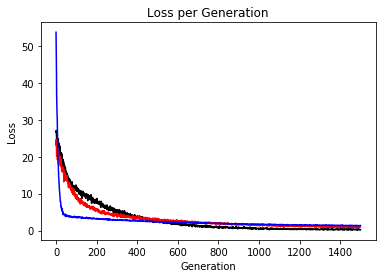

In [10]:
# 3-8 recipe 23
## Elastic Net
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

iris = datasets.load_iris()

x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# define placeholder and variables
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# define model(y = x * A + b)
model_output = tf.add(tf.matmul(x_data, A), b)

# define loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(
    tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term),
    e2_term), 0)

# initialize
init = tf.global_variables_initializer()
sess.run(init)

# define optimization function
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

# update variables
loss_vec3 = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec3.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' +
                str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

plt.plot(loss_vec1, 'k-', label='Lasso regression')
plt.plot(loss_vec2, 'r-', label='ridge regression')
plt.plot(loss_vec3, 'b-', label='Elastic Net')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

Loss = 0.84512436
Loss = 0.65806144
Loss = 0.4718518
Loss = 0.6434686
Loss = 0.6720767


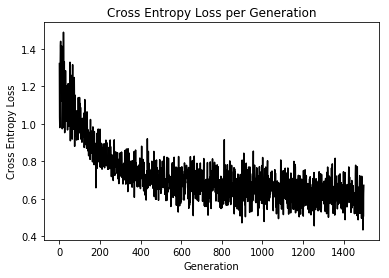

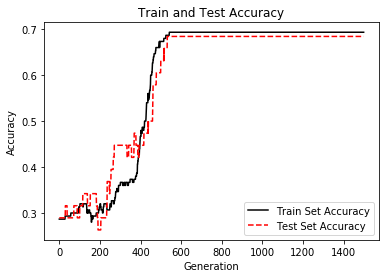

In [35]:
# 3-9 recipe 24
import os, csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

# download data
birth_weight_file = './data/birthweightfile.dat'
if not os.path.exists(birth_weight_file):
    birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/' + \
    'raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
    birth_file = requests.get(birthdata_url)
    birth_data = birth_file.text.split('\r\n')
    birth_header = birth_data[0].split('\t')
    birth_data = [[float(x) for x in y.split('\t') if len(x)>=1]
            for y in birth_data[1:] if len(y)>=1]
    with open(birth_weight_file, "w") as f:
        writer = csv.writer(f)
        writer.writerows(birth_data)
        f.close()
        
# load data
birth_data = []
with open(birth_weight_file, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    birth_header = next(csv_reader)
    for row in csv_reader:
        birth_data.append(row)
        
birth_data = [[float(x) for x in row] for row in birth_data]

y_vals = np.array([x[0] for x in birth_data])
x_vals = np.array([x[1:8] for x in birth_data])

# set for reproducible results
seed = 99
np.random.seed(seed)
tf.set_random_seed(seed)

# split data for creating training and test datasets
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8),
                                     replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

def normalize_cols(m):
    col_max = m.max(axis = 0)
    col_min = m.min(axis = 0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# define placeholder and variables
batch_size = 25
x_data = tf.placeholder(shape = [None, 7], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [7, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

# define model
model_output = tf.add(tf.matmul(x_data, A), b)

# define loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits = model_output, labels = y_target))

# initialize
init = tf.global_variables_initializer()
sess.run(init)

# define optimization function
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# 
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

# updata variables
loss_vec = []
train_acc = []
test_acc = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train,
                                                  y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test,
                                                  y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)
    if (i+1)%300==0:
        print('Loss = ' + str(temp_loss))

# plot
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()